In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

In [11]:
def mean_vol_sharpe_var(df,ann=12):
    mean = df.mean() * ann
    volatility = df.std() * np.sqrt(ann)
    sharpe_ratio = mean/volatility
    var = df.quantile(0.05)
    return pd.DataFrame({'mean': mean, 'volatility': volatility, 'sharpe_ratio': sharpe_ratio, 'var': var})

In [26]:
df_desc = pd.read_excel("dfa_analysis_data.xlsx",0, index_col=0)
df_desc

,Name,Unit,Construction,Description
Mkt-RF,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RF,Risk-free rate,Total Return,Tbills,NaN


In [13]:
df = pd.read_excel("dfa_analysis_data.xlsx",1, index_col=0)
df.index = pd.to_datetime(df.index)
df.tail(2)

,Mkt-RF,SMB,HML,RF
Date,,,,
2022-07-31,0.0957,0.0281,-0.0410,0.0008
2022-08-31,-0.0378,0.0139,0.0031,0.0019


In [32]:
factor = df.drop(['RF'],axis=1)
factor.head(2)

,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382


# 2 The Factors

#### DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a “size” and “value” factor. Note that these three factors are already listed as excess returns.1
#### Use the data found in ‘dfa analysis data.xlsx’.
- **FACTORS**: Monthly excess return data for the overall equity market, r ̃m. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

### 2.1 The Factors. Calculate their univariate performance statistics:

Report these for the following three subsamples: <br>
- **Beginning - 1980**

In [34]:
mean_vol_sharpe_var(factor[:'1980'])

,mean,volatility,sharpe_ratio,var
Mkt-RF,0.0811,0.2051,0.3957,-0.0840
SMB,0.0340,0.1146,0.2966,-0.0434
HML,0.0495,0.1338,0.3697,-0.0429


- **1981 - 2001**

In [35]:
mean_vol_sharpe_var(factor['1981':'2001'])

,mean,volatility,sharpe_ratio,var
Mkt-RF,0.0773,0.1574,0.4908,-0.0645
SMB,-0.0009,0.1184,-0.0074,-0.0466
HML,0.0637,0.1113,0.5727,-0.0418


- **2002 - End**

In [36]:
mean_vol_sharpe_var(factor['2002':])

,mean,volatility,sharpe_ratio,var
Mkt-RF,0.0833,0.1540,0.5409,-0.0788
SMB,0.0196,0.0858,0.2288,-0.0378
HML,0.0017,0.1045,0.0161,-0.0410


### 2.2 Based on the factor statistics above, answer the following.


#### (a) Does each factor have a premium (positive expected excess return) in each subsample?


No, the SMB factor has a negative expected excess return in the 1981-2001 subsample.

#### (b) Does the premium to the size factor get smaller after 1980?

**Answer-** Yes, the premium to the size factor gets smaller after 1980. In fact, the premium to the size factor is negative in the 1981-2001 subsample. Furthermore, we see a smaller mean excess return of 2.76% in the 2001-end subsample compared to the 3.4% excess in Beginning-1980.

#### (c) Does the premium to the value factor get smaller during the 1990’s?

**Answer-** Premium to value factor, also called value premium or HML(High-Minus-Low) increases during the 1990’s. But it gets smaller after 2001.

#### (d) How have the factors performed since the time of the case, (2002-present)?

**Answer-** The market has hands down outperformed the value and size factors. The market has a mean excess return of 8.33% in the 2002-present subsample, while the value factor has a mean excess return of 0.17% and the size factor has a mean excess return of 1.96%. The HML/value factor has performed very poorly while the SMB/size factor has performed better than the past decade.

### 2.3 The factors are constructed in such a way as to reduce correlation between them.
### Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? Does it achieve this in each subsample?

**Answer-** Correlation before 1980's (31%-47%) is higher than that after 1980's. Overall the correlations are quite small, and the construction method succeeds in keeping correlations small.

<AxesSubplot:>

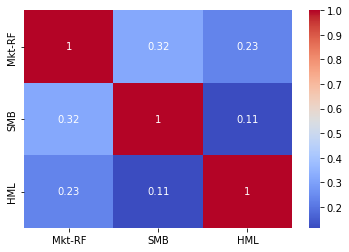

In [30]:
corr = factor.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

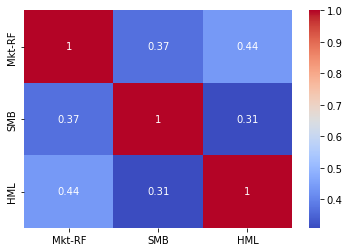

In [37]:
corr_1980 = factor[:'1980'].corr()
sns.heatmap(corr_1980, annot=True, cmap='coolwarm')

<AxesSubplot:>

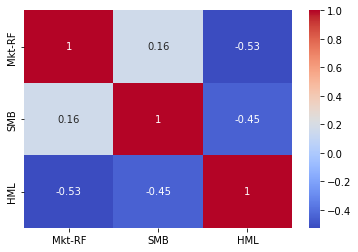

In [38]:
corr_2001 = factor['1981':'2001'].corr()
sns.heatmap(corr_2001, annot=True, cmap='coolwarm')

<AxesSubplot:>

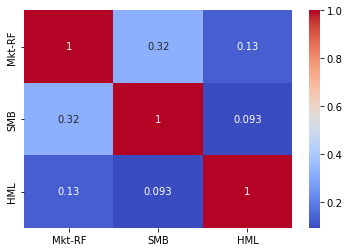

In [39]:
corr_2022 = factor['2002':].corr()
sns.heatmap(corr_2022, annot=True, cmap='coolwarm')

### 2.4 Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

Text(0.5, 1.0, 'Full Sample')

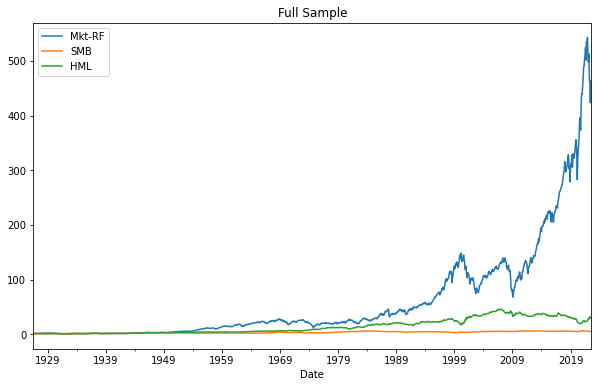

In [46]:
cumulative_return = (1+factor).cumprod()
cumulative_return.plot(figsize=(10,6))
plt.title("Full Sample")

Text(0.5, 1.0, '1981-2001')

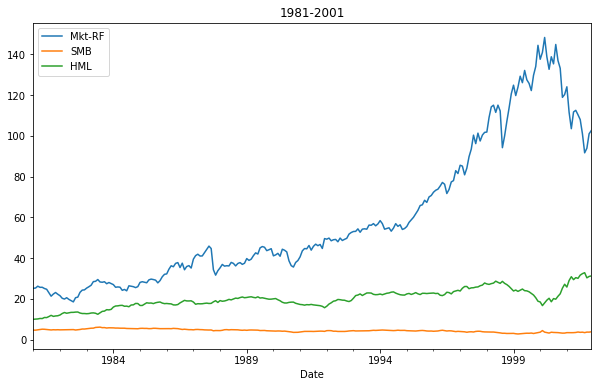

In [47]:
cumulative_return['1981':'2001'].plot(figsize=(10,6))
plt.title("1981-2001")

Text(0.5, 1.0, '2002-Present')

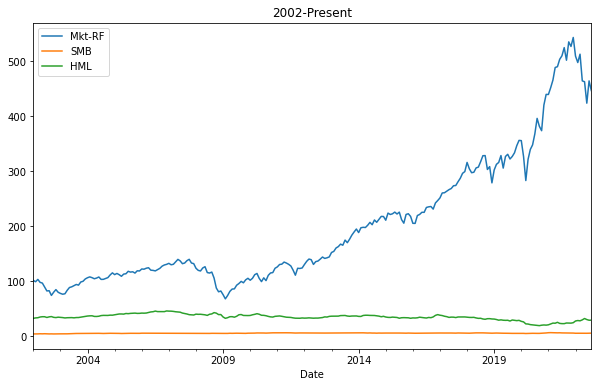

In [48]:
cumulative_return['2002':].plot(figsize=(10,6))
plt.title("2002-Present")

### 2.5 Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

The size factor SMB is not valuable in 1981-2001, infact its negative. Post 2001, the SMB factor gives a small mean return, but is still underperforming the market. The value factor HML is valuable from Beginning-2001 and then the premium reaches very low levels. The market is the best performer in all the three subsamples.

# 3 CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors. <br> Let’s test 25 equity portfolios that span a wide range of size and value measures.
- PORTFOLIOS: Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as $r^i$, for $n = 1, . . . , 25$.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.


In [65]:
portfolios = pd.read_excel("dfa_analysis_data.xlsx",2, index_col=0)
portfolios.index = pd.to_datetime(portfolios.index)
portfolios_excess = portfolios.subtract(df['RF'],axis=0)
portfolios_excess_1981 = portfolios_excess['1981':]
portfolios_excess_1981.head(2)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0597,-0.0107,-0.0127,0.0076,0.0206,...,-0.0770,-0.0449,-0.0129,-0.0055,0.0039,-0.0717,-0.0836,-0.0743,-0.0100,0.0095
1981-02-28,-0.0447,-0.0105,0.0014,0.0092,0.0144,-0.0145,0.0051,0.0174,0.0244,0.0279,...,0.0026,0.0147,0.0347,0.0027,0.0272,0.0219,0.0094,-0.0164,0.0204,-0.0169


### 3.1 Summary Statistics.
#### For each portfolio,
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from 1.1.

In [67]:
mean_vol_sharpe_var(portfolios_excess_1981).T

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
mean,0.0105,0.0957,0.0929,0.1200,0.1321,0.0603,0.1006,0.1066,0.1077,0.1181,...,0.0927,0.0945,0.0936,0.0998,0.1120,0.0889,0.0816,0.0811,0.0671,0.0963
volatility,0.2724,0.2359,0.1972,0.1914,0.2077,0.2457,0.2032,0.1831,0.1792,0.2120,...,0.2036,0.1770,0.1733,0.1733,0.1968,0.1632,0.1549,0.1523,0.1703,0.2058
sharpe_ratio,0.0384,0.4058,0.4711,0.6270,0.6361,0.2453,0.4953,0.5824,0.6012,0.5571,...,0.4551,0.5341,0.5402,0.5756,0.5693,0.5447,0.5271,0.5324,0.3943,0.4681
var,-0.1165,-0.0976,-0.0864,-0.0752,-0.0883,-0.1046,-0.0840,-0.0787,-0.0764,-0.0942,...,-0.0839,-0.0734,-0.0756,-0.0693,-0.0833,-0.0753,-0.0656,-0.0704,-0.0756,-0.0985


#### - Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

**Answer-** After observing the scatter plots below, the mean excess return do not seem to have any relation with the volatilities or VaR(.05) statistics.

Text(0.5, 0, 'Volatility')

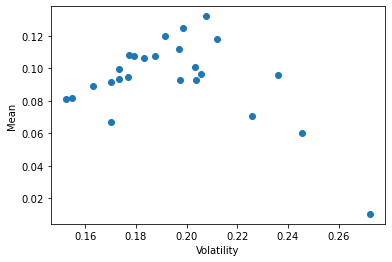

In [75]:
plt.scatter(mean_vol_sharpe_var(portfolios_excess_1981)['volatility'], mean_vol_sharpe_var(portfolios_excess_1981)['mean'])
plt.ylabel('Mean')
plt.xlabel('Volatility')

Text(0.5, 0, 'VaR')

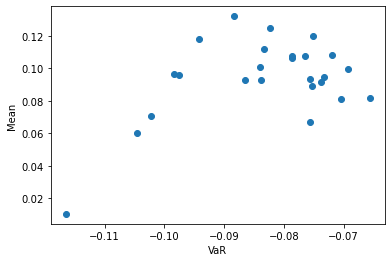

In [73]:
plt.scatter(mean_vol_sharpe_var(portfolios_excess_1981)['var'], mean_vol_sharpe_var(portfolios_excess_1981)['mean'])
plt.ylabel('Mean')
plt.xlabel('VaR')

### 3.2 CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.) <br>

Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$ , its mean is proportional to the mean excess
return of the market, $\tilde{r}^{m}$ , where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{m}$ . <br>

$\mathbf{E}[\tilde{r}^{i}_{t}] = \beta^{i,m} \mathbf{E}[\tilde{r}^{m}_{t}]$ 

Let’s examine whether that seems plausible.

### 3.2(a) For each of the n = 25 test portfolios, run the CAPM time-series regression: <br> $ \tilde{r}_{t} = \alpha^{i} + \beta^{i,m}  \tilde{r}^{m}_{t} + \epsilon^{i}_{t} $ 

So you are running 25 separate regressions, each using the T-sized sample of time-series data.

### 3.2(b) Report the estimated $ \beta_{i,m} $, Treynor Ratio, $ \alpha_{i} $, and Information Ratio for each of the n regressions.

In [122]:
portfolios_excess_1981.shape

(500, 25)

In [88]:
factor_mkt = pd.DataFrame(factor['1981':]['Mkt-RF'], columns=['Mkt-RF'])
factor_mkt.shape

(500, 1)

In [111]:
regression_report = pd.DataFrame(index=portfolios_excess_1981.columns)
x = sm.add_constant(factor_mkt)

for i in portfolios_excess_1981.columns:
    y = portfolios_excess_1981[i]
    model = sm.OLS(y,x,missing='drop').fit()
    regression_report.loc[i,'alpha'] = model.params['const'] * 12
    regression_report.loc[i,'beta'] = model.params['Mkt-RF']
    regression_report.loc[i,'treynor ratio'] = portfolios_excess_1981[i].mean() * 12 / model.params[1]
    regression_report.loc[i,'info ratio'] = model.params[0] * np.sqrt(12) / model.resid.std()
    
regression_report
    

,alpha,beta,treynor ratio,info ratio
SMALL LoBM,-0.0987,1.3600,0.0077,-0.5750
ME1 BM2,0.0018,1.1702,0.0818,0.0122
ME1 BM3,0.0097,1.0365,0.0896,0.0857
ME1 BM4,0.0425,0.9652,0.1243,0.3585
SMALL HiBM,0.0526,0.9907,0.1333,0.3778
ME2 BM1,-0.0475,1.3433,0.0449,-0.3677
ME2 BM2,0.0101,1.1286,0.0892,0.0984
ME2 BM3,0.0248,1.0193,0.1046,0.2712
ME2 BM4,0.0303,0.9654,0.1116,0.3094
ME2 BM5,0.0292,1.1086,0.1066,0.2363


### 3.2(c) If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

CAPM states that the expected excess return of a portfolio is proportional to the expected excess return of the market. The Alpha and Information Ratio should be equal to zero. As a consequence, the Treynor Ratio should be equal to mean excess return of the market.

### 3.3 Cross-sectional Estimation
**Let’s test (CAPM) directly. We already have what we need:**
- The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
- The regressor, (x): the market beta from each of the n = 25 time-series regressions.

$ \mathbf{E}[\tilde{r}^{i}] = \eta + \beta^{i,m}; \lambda_{m} + \nu $

- Note that we use sample means as estimates of $ \mathbf{E}[\tilde{r}^{i}] $.
- This is a weird regression! The regressors are the betas from the time-series regressions we
already ran!
- This is a single regression, where we are combining evidence across all n = 25 series. Thus, it is a cross-sectional regression!
- The notation is trying to emphasize that the intercept is different than the time-series $ \alpha $ and that the regressor coefficient is different than the time-series betas.

In [116]:
y = portfolios_excess_1981.mean()
X = sm.add_constant(regression_report['beta'])

model_2 = sm.OLS(y,X,missing='drop').fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Sun, 23 Oct 2022   Prob (F-statistic):            0.00950
Time:                        17:04:42   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta          -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.3(a) Report the R-squared of this regression.

In [125]:
model_2.rsquared

0.258245119213633

#### 3.3(b) Report the intercept, $ \eta $

In [124]:
model_2.params[0] * 12 #annualized alpha

0.19798077049490959

#### 3.3(c) Report the regression coefficient, $ \lambda_{m} $.

In [123]:
model_2.params[1] #beta

-0.008179800316649432

#### What would these three statistics be if (CAPM) were true?
- If CAPM were true, the intercept would be equal to zero. The regression coefficient would be equal to the mean excess return of the market. The R-squared would be equal to one.

#### 3.4 Broadly speaking, do these results support DFA’s belief in size and value portfolios containing premia unrelated to the CAPM?
- 